# Demonstration of the functionality of the ``anisotropic_models`` module

The ``anisotropic_models`` module provides several simplified seismic models to estimate seismic wavespeeds as a function of propagation direction and seismic anisotropy. These model simplifications are used to make the complex nature of seismic anisotropy more manageable for analysis and interpretation.

TODO

In [1]:
# import some general scientific Python libraries
import matplotlib.pyplot as plt
import numpy as np

# import required PyRockWave modules
import elastic_database as edb
import anisotropic_models as am
import coordinates

Mineral Elastic Database v.2024.2.01 imported


## Example of tranverse isotropy (polar) models

The simplest plausible model used in geophysics is horizontal transverse isotropy (also called polar, hexagonal symmetry, or radial anisotropy in the literature). The modeule includes two polar models for body waves: the Weak Polar Anisotropy model (Thomsen, 1986) and the Anderson polar anisotropy model (Anderson, 1961). The Weak Polar Anisotropy model assumes that anisotropy in rocks is generally weak and simplifies the Anderson model.

As an example, we will use these models to calculate seismic velocities as a function of propagation orientation in a chlorite crystal. Phyllosilicates like chlorite have a hexagonal geometry, making their physical properties well-suited for polar models. Unlike most rocks, phyllosilicates exhibit strong anisotropy, allowing us to test whether the Weak Polar Anisotropy model provides realistic predictions compared to the Anderson model or direct calculations using the Christoffel equation.

TODO

In [2]:
# load the chlorite elactic properties from database
chl = edb.chlorite()
chl

<class 'ElasticClass.ElasticProps'>

Mineral Name: Chlorite
Reference Source: https://doi.org/10.1002/2014GL059334
Crystal System: Monoclinic
Pressure (GPa): 0.0
Temperature (°C): 25
Density (g/cm3): 2.534

Elastic Tensor (Cij) in GPa:
[[197.8  60.7  21.1   0.    3.3   0. ]
 [ 60.7 202.3  34.1   0.    0.2   0. ]
 [ 21.1  34.1 135.1   0.    0.4   0. ]
 [  0.    0.    0.   24.5   0.    0.1]
 [  3.3   0.2   0.4   0.   24.4   0. ]
 [  0.    0.    0.    0.1   0.   70.3]]

Tensor decomposition (Browaeys & Chevrot approach):
    Isotropy = 71.1 %
    Anisotropy = 28.9 %

Anisotropy indexes:
    Universal Elastic Anisotropy:           1.581
    Kube's Anisotropy Index (proportional): 0.595

Calculated elastic average properties:
Unit:GPa  Bulk_modulus  Shear_modulus  Poisson_ratio
   Voigt        85.222         51.793          0.247
    Hill        82.553         45.772          0.266
   Reuss        79.883         39.751          0.287

Isotropic seismic properties:
Unit:km/s    Vp    Vs  Vp/

In [3]:
# generate a set of wavevectors (60000 propagation directions)
wavevectors = coordinates.equispaced_S2_grid(num_points=60000, hemisphere='upper')

In [4]:
# calculate tranvese isotropy models
model1 = am.weak_polar_anisotropy(cij=chl.Cij, density_gcm3=chl.density, wavevectors_rad=wavevectors)
model2 = am.polar_anisotropy(cij=chl.Cij, density_gcm3=chl.density, wavevectors_rad=wavevectors)

model1

,polar_ang,azimuthal_ang,Vsv,Vsh,Vp,Vs1,Vs2,SWS
0,0.000000,0.000000,3.109423,3.109423,7.301706,3.109423,3.109423,0.0
1,0.028863,0.000000,3.117581,3.111843,7.299643,3.117581,3.111843,0.2
2,0.029435,3.883222,3.117907,3.111940,7.299561,3.117907,3.111940,0.2
3,0.029995,1.483259,3.118233,3.112037,7.299479,3.118233,3.112037,0.2
4,0.030546,5.366481,3.118559,3.112133,7.299396,3.118559,3.112133,0.2
...,...,...,...,...,...,...,...,...
59995,1.570721,2.080495,3.109423,6.015781,8.996070,6.015781,3.109423,63.7
59996,1.570738,5.963717,3.109423,6.015781,8.996070,6.015781,3.109423,63.7
59997,1.570755,3.563754,3.109423,6.015781,8.996070,6.015781,3.109423,63.7
59998,1.570771,1.163791,3.109423,6.015781,8.996070,6.015781,3.109423,63.7


### Plot $V_P$ as a function of propagation direction

> TODO:
> - add Christoffel calculation!!!
> - match colour ramps

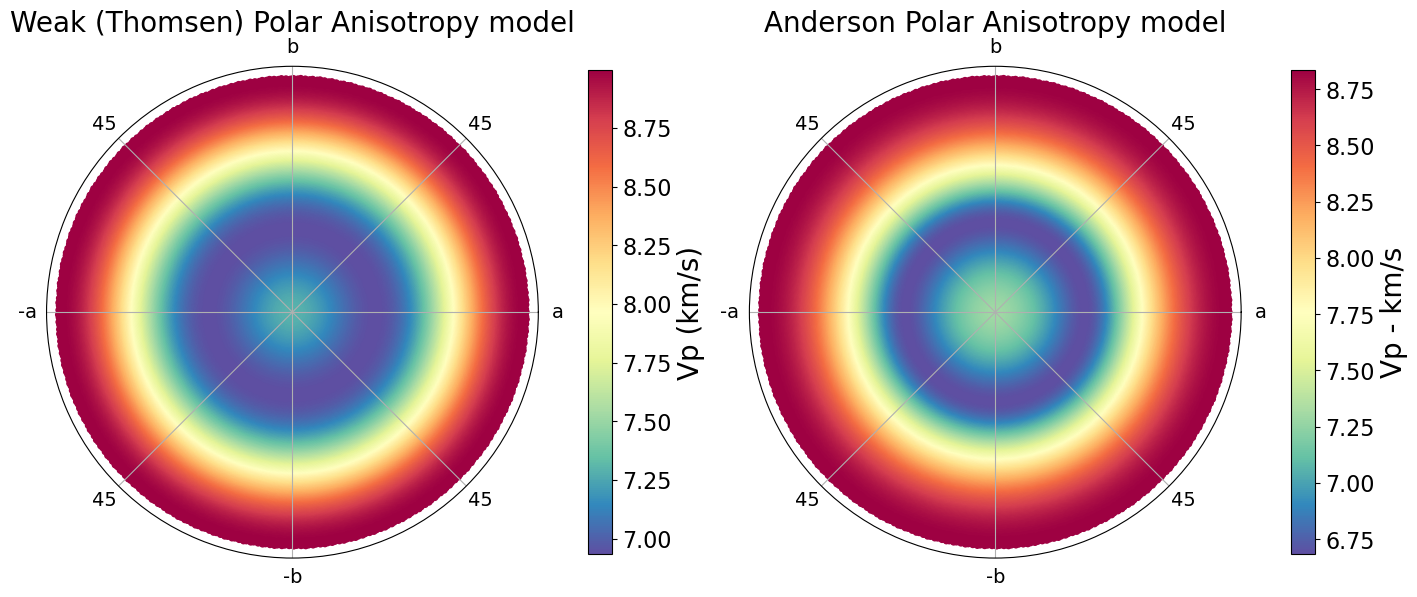

In [5]:
fig1, (ax1, ax2) = plt.subplots(subplot_kw={'projection': 'polar'}, constrained_layout=True, ncols=2, figsize=(14,7))

# Model 1
ax1.set_theta_direction(-1)
ax1.set_xticks(np.arange(0, 2*np.pi, np.pi/4))
ax1.set_xticklabels(['a', '45', '-b', '45', '-a', '45', 'b', '45'], fontsize=14)
ax1.set_yticks([])
ax1.set_title('Weak (Thomsen) Polar Anisotropy model', fontsize=20, pad=25)

cm = ax1.scatter(model1['azimuthal_ang'],
                 model1['polar_ang'],
                 c=model1['Vp'],
                 s=15,
                 cmap='Spectral_r')

# add color bar
cbar = fig1.colorbar(cm, ax=ax1, shrink=0.7, location='right')
cbar.set_label('Vp (km/s)', fontsize=20)
cbar.ax.tick_params(labelsize=16)

# Model 2
ax2.set_theta_direction(-1)
ax2.set_xticks(np.arange(0, 2*np.pi, np.pi/4))
ax2.set_xticklabels(['a', '45', '-b', '45', '-a', '45', 'b', '45'], fontsize=14)
ax2.set_yticks([])
ax2.set_title('Anderson Polar Anisotropy model', fontsize=20, pad=25)

cm = ax2.scatter(model2['azimuthal_ang'],
                 model2['polar_ang'],
                 c=model2['Vp'],
                 s=15,
                 cmap='Spectral_r')

# add color bar
cbar = fig1.colorbar(cm, ax=ax2, shrink=0.7, location='right')
cbar.set_label('Vp - km/s', fontsize=20)
cbar.ax.tick_params(labelsize=16)

### Plot $V_{S1}$ and $V_{S2}$ as a function of propagation direction (Thomsen model)

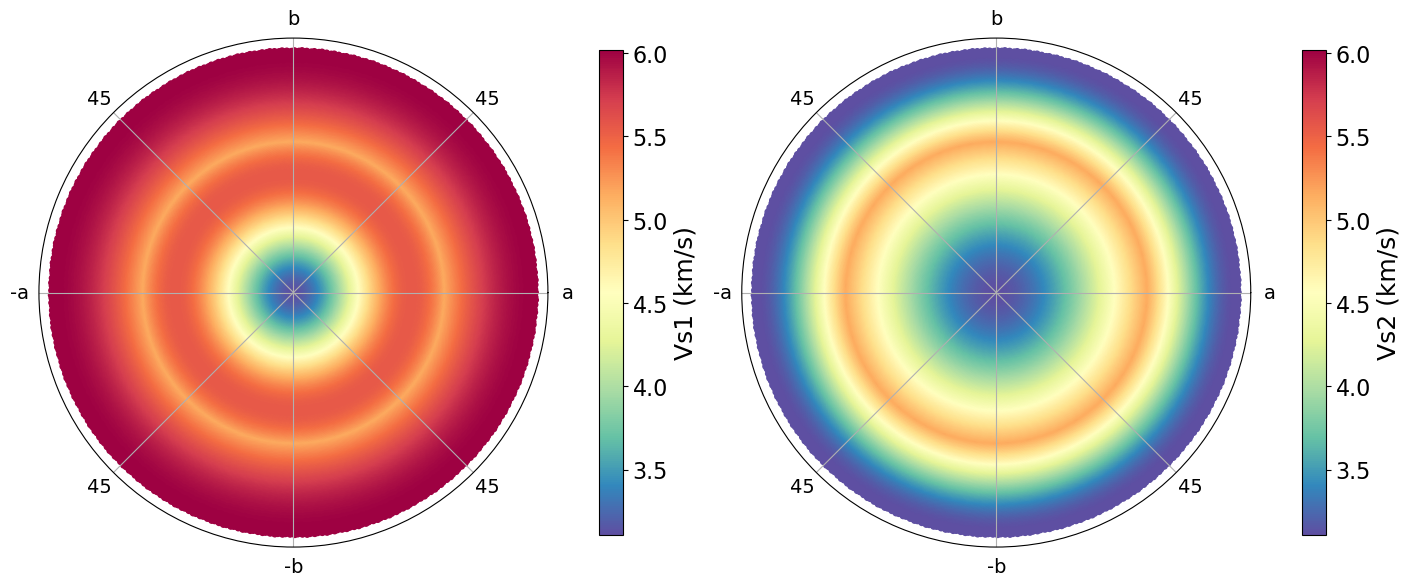

In [6]:
fig2, (ax1, ax2) = plt.subplots(subplot_kw={'projection': 'polar'}, constrained_layout=True, ncols=2, figsize=(14,7))

# VS2 (slow)
ax1.set_theta_direction(-1)
ax1.set_xticks(np.arange(0, 2*np.pi, np.pi/4))
ax1.set_xticklabels(['a', '45', '-b', '45', '-a', '45', 'b', '45'], fontsize=14)
ax1.set_yticks([])

cm = ax1.scatter(model1['azimuthal_ang'],
                 model1['polar_ang'],
                 c=model1['Vs1'],
                 s=15,
                 cmap='Spectral_r',
                 vmax=model1['Vs1'].max(),
                 vmin=model1['Vs2'].min())

# add color bar
cbar = fig2.colorbar(cm, ax=ax1, shrink=0.7, location='right')
cbar.set_label('Vs1 (km/s)', fontsize=18)
cbar.ax.tick_params(labelsize=16)

# VS1 (fast)
ax2.set_theta_direction(-1)
ax2.set_xticks(np.arange(0, 2*np.pi, np.pi/4))
ax2.set_xticklabels(['a', '45', '-b', '45', '-a', '45', 'b', '45'], fontsize=14)
ax2.set_yticks([])

cm = ax2.scatter(model1['azimuthal_ang'],
                 model1['polar_ang'],
                 c=model1['Vs2'],
                 s=15,
                 cmap='Spectral_r',
                 vmax=model1['Vs1'].max(),
                 vmin=model1['Vs2'].min())

# add color bar
cbar = fig2.colorbar(cm, ax=ax2, shrink=0.7, location='right')
cbar.set_label('Vs2 (km/s)', fontsize=18)
cbar.ax.tick_params(labelsize=16)

### Polarization anisotropy (shear-wave splitting) in percentage

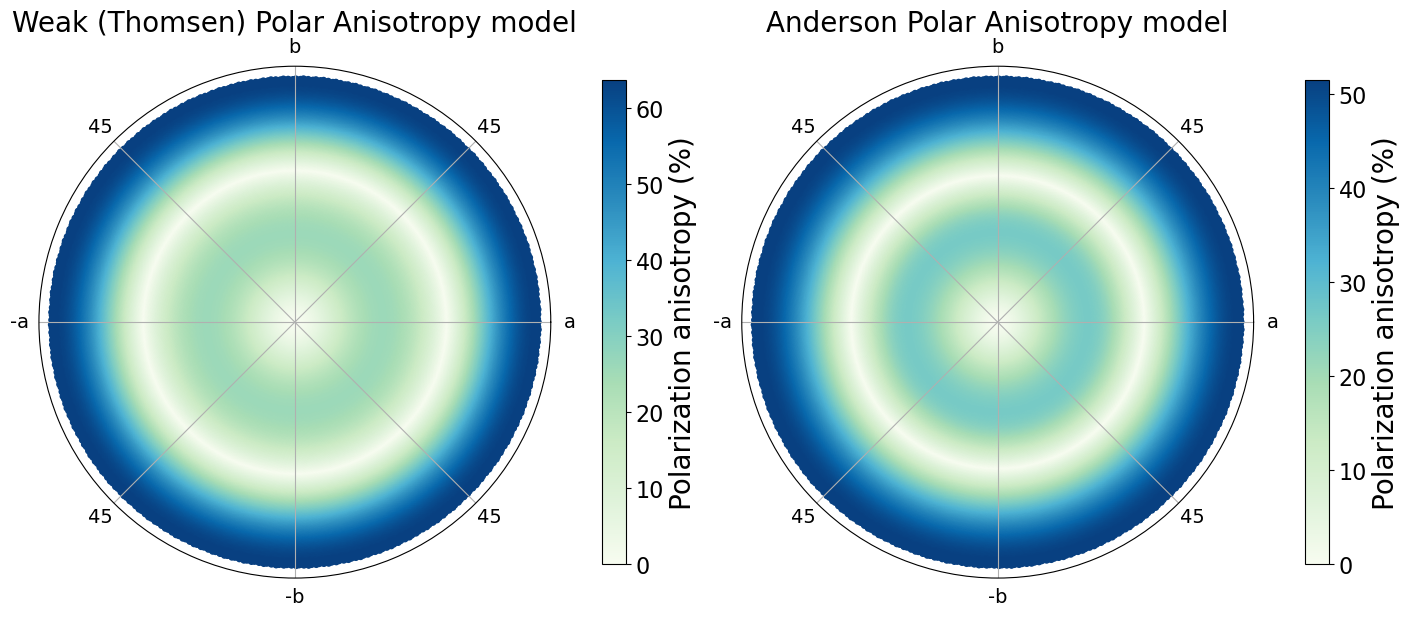

In [7]:
fig3, (ax1, ax2) = plt.subplots(subplot_kw={'projection': 'polar'}, constrained_layout=True, ncols=2, figsize=(14,7))

# Model 1
ax1.set_theta_direction(-1)
ax1.set_xticks(np.arange(0, 2*np.pi, np.pi/4))
ax1.set_xticklabels(['a', '45', '-b', '45', '-a', '45', 'b', '45'], fontsize=14)
ax1.set_yticks([])
ax1.set_title('Weak (Thomsen) Polar Anisotropy model', fontsize=20, pad=25)

cm = ax1.scatter(model1['azimuthal_ang'],
                 model1['polar_ang'],
                 c=model1['SWS'],
                 s=15,
                 cmap='GnBu')

# add color bar
cbar = fig3.colorbar(cm, ax=ax1, shrink=0.7, location='right')
cbar.set_label('Polarization anisotropy (%)', fontsize=20)
cbar.ax.tick_params(labelsize=16)

# Model 2
ax2.set_theta_direction(-1)
ax2.set_xticks(np.arange(0, 2*np.pi, np.pi/4))
ax2.set_xticklabels(['a', '45', '-b', '45', '-a', '45', 'b', '45'], fontsize=14)
ax2.set_yticks([])
ax2.set_title('Anderson Polar Anisotropy model', fontsize=20, pad=25)

cm = ax2.scatter(model2['azimuthal_ang'],
                 model2['polar_ang'],
                 c=model2['SWS'],
                 s=15,
                 cmap='GnBu')

# add color bar
cbar = fig3.colorbar(cm, ax=ax2, shrink=0.7, location='right')
cbar.set_label('Polarization anisotropy (%)', fontsize=20)
cbar.ax.tick_params(labelsize=16)

### Plotting axial and azimuthal profiles 

In [8]:
# set a custom style for plots
import matplotlib as mpl
mpl.style.use('fivethirtyeight')
mpl.rcParams['figure.facecolor'] = 'white'
mpl.rcParams['axes.facecolor'] = 'white'
mpl.rcParams['axes.edgecolor'] = 'white'
mpl.rcParams['axes.titlesize'] = 15
mpl.rcParams['axes.labelsize'] = 15

In [9]:
# generate profiles
latitudes = np.radians(np.arange(0, 91))
azimuths = np.radians(np.arange(0, 361))
axial_profile = np.full_like(latitudes, fill_value=np.pi/2), latitudes
azimuthal_profile = azimuths, np.full_like(azimuths, fill_value=np.pi/2)

# calculate seismic properties along profiles
axial_props1 = am.weak_polar_anisotropy(chl.Cij, chl.density, axial_profile)
azimuthal_props1 = am.weak_polar_anisotropy(chl.Cij, chl.density, azimuthal_profile)
axial_props2 = am.polar_anisotropy(chl.Cij, chl.density, axial_profile)
azimuthal_props2 = am.polar_anisotropy(chl.Cij, chl.density, azimuthal_profile)

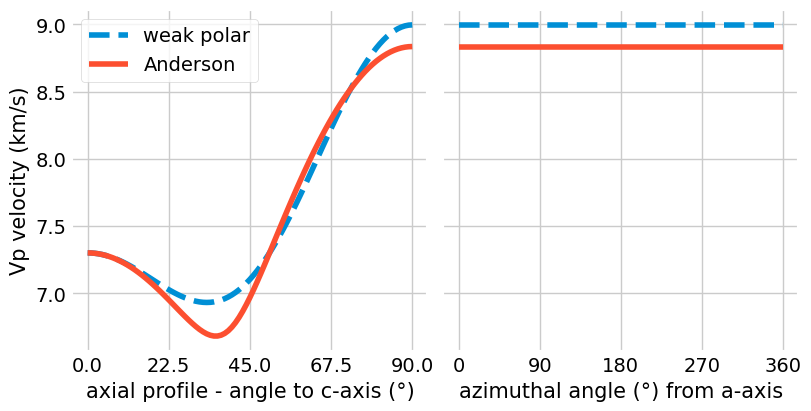

In [10]:
fig4, (ax1, ax2) = plt.subplots(figsize=(8, 4), ncols=2, sharey=True, constrained_layout=True)

# average polar Vp velocities (grouped and averaged by latitude angle)
ax1.plot(np.rad2deg(axial_props1['polar_ang']), axial_props1['Vp'], '--', label='weak polar')
ax1.plot(np.rad2deg(axial_props2['polar_ang']), axial_props2['Vp'], label='Anderson')
ax1.set_ylabel('Vp velocity (km/s)', fontsize=15)
ax1.set_xlabel('axial profile - angle to c-axis (°)', fontsize=15)
ax1.set_xticks([0,22.5,45,67.5,90])
ax1.legend()

# azimuthal (latitude == 0) Vp velocities 
ax2.plot(np.rad2deg(azimuthal_props1['azimuthal_ang']), azimuthal_props1['Vp'], '--')
ax2.plot(np.rad2deg(azimuthal_props2['azimuthal_ang']), azimuthal_props2['Vp'])
ax2.set_xlabel('azimuthal angle (°) from a-axis', fontsize=15)
_ = ax2.set_xticks([0,90,180,270,360])

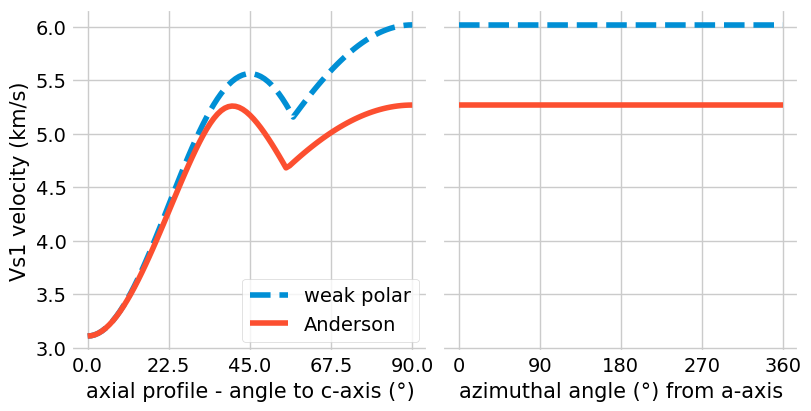

In [11]:
fig5, (ax1, ax2) = plt.subplots(figsize=(8, 4), ncols=2, sharey=True, constrained_layout=True)

# average polar Vp velocities (grouped and averaged by latitude angle)
ax1.plot(np.rad2deg(axial_props1['polar_ang']), axial_props1['Vs1'], '--', label='weak polar')
ax1.plot(np.rad2deg(axial_props2['polar_ang']), axial_props2['Vs1'], label='Anderson')
ax1.set_ylabel('Vs1 velocity (km/s)', fontsize=15)
ax1.set_xlabel('axial profile - angle to c-axis (°)', fontsize=15)
ax1.set_xticks([0,22.5,45,67.5,90])
ax1.legend()

# azimuthal (latitude == 0) Vp velocities 
ax2.plot(np.rad2deg(azimuthal_props1['azimuthal_ang']), azimuthal_props1['Vs1'], '--')
ax2.plot(np.rad2deg(azimuthal_props2['azimuthal_ang']), azimuthal_props2['Vs1'])
ax2.set_xlabel('azimuthal angle (°) from a-axis', fontsize=15)
_ = ax2.set_xticks([0,90,180,270,360])

## Example of orthotropic (orthorhombic symmetry) models

More realistic models incorporate azimuthal anisotropy, as most rock formations on Earth exhibit this property, which reflects lower symmetry than polar anisotropy. The simplest practical case of azimuthal anisotropy is orthorhombic symmetry with a vertical symmetry axis, often referred to as orthotropic models. TODO

As an example, we will test orthorhombic models by calculating seismic velocities and anisotropy in an olivine crystal, which exhibits strong orthorhombic symmetry.

In [12]:
# load the olivine elactic properties from database
olivine = edb.forsterite_Mao()
olivine

<class 'ElasticClass.ElasticProps'>

Mineral Name: Forsterite
Reference Source: https://doi.org/10.1016/j.epsl.2015.06.045
Crystal System: Orthorhombic
Pressure (GPa): 0.0
Temperature (°C): 627
Density (g/cm3): 3.246

Elastic Tensor (Cij) in GPa:
[[296.02  38.36  58.15   0.     0.     0.  ]
 [ 38.36 179.72  75.03   0.     0.     0.  ]
 [ 58.15  75.03 210.01   0.     0.     0.  ]
 [  0.     0.     0.    56.42   0.     0.  ]
 [  0.     0.     0.     0.    71.04   0.  ]
 [  0.     0.     0.     0.     0.    71.01]]

Tensor decomposition (Browaeys & Chevrot approach):
    Isotropy = 73.6 %
    Anisotropy = 26.4 %

Anisotropy indexes:
    Universal Elastic Anisotropy:           0.342
    Kube's Anisotropy Index (proportional): 0.139

Calculated elastic average properties:
Unit:GPa  Bulk_modulus  Shear_modulus  Poisson_ratio
   Voigt       114.314         73.975          0.234
    Hill       112.838         71.777          0.238
   Reuss       111.361         69.579          0.241

Isotropic

In [13]:
# apply the Hao and Stovas (2016) model for azimuthal orthotropic anisotropy
model = am.orthotropic_azimuthal_anisotropy(cij=olivine.Cij, density_gcm3=olivine.density, wavevectors_rad=wavevectors)
model

,polar_ang,azimuthal_ang,Vp
0,0.000000,0.000000,8.043512
1,0.028863,0.000000,8.122328
2,0.029435,3.883222,8.118228
3,0.029995,1.483259,8.093394
4,0.030546,5.366481,8.115295
...,...,...,...
59995,1.570721,2.080495,8.521190
59996,1.570738,5.963717,9.542909
59997,1.570755,3.563754,9.516389
59998,1.570771,1.163791,8.233013


In [14]:
mpl.style.use('fast')

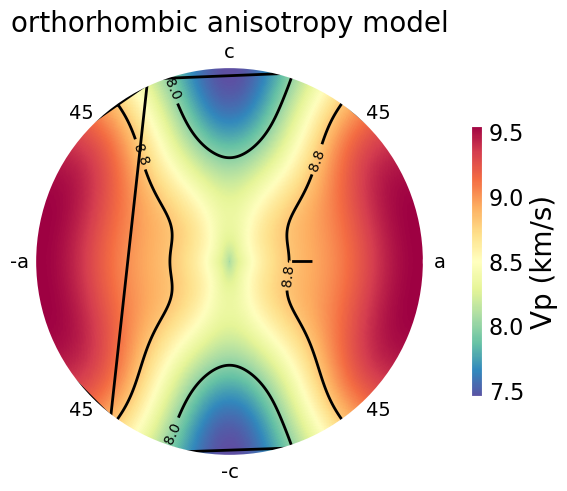

In [15]:
fig6, ax = plt.subplots(subplot_kw={'projection': 'polar'}, constrained_layout=True)

ax.set_theta_direction(-1)
ax.set_xticks(np.arange(0, 2*np.pi, np.pi/4))
ax.set_xticklabels(['a', '45', '-c', '45', '-a', '45', 'c', '45'], fontsize=14)
ax.set_yticks([])
ax.set_title('orthorhombic anisotropy model', fontsize=20, pad=25)

cm = ax.scatter(model['azimuthal_ang'],
                model['polar_ang'],
                c=model['Vp'],
                s=15,
                cmap='Spectral_r')

# add color bar
cbar = fig6.colorbar(cm, ax=ax, shrink=0.7, location='right')
cbar.set_label('Vp (km/s)', fontsize=20)
cbar.ax.tick_params(labelsize=16)

# rough contour (artifact, see https://github.com/matplotlib/matplotlib/issues/19492)
cs = ax.tricontour(model['azimuthal_ang'],
                   model['polar_ang'],
                   model['Vp'],
                   levels=2,
                   linestyles="solid", colors="k", linewidths=2.0)
_ = ax.clabel(cs, cs.levels, inline=True, fontsize=10)

> TODO: Fix the problem with contours in the polar plot

In [16]:
# generate profiles
latitudes = np.radians(np.arange(0, 91))
azimuths = np.radians(np.arange(0, 361))
axial_profile1 = np.full_like(latitudes, fill_value=np.pi/2), latitudes
axial_profile2 = np.zeros_like(latitudes), latitudes
azimuthal_profile = azimuths, np.full_like(azimuths, fill_value=np.pi/2)

# calculate seismic properties along profiles
axial_props1 = am.orthotropic_azimuthal_anisotropy(olivine.Cij, olivine.density, axial_profile1)
axial_props2 = am.orthotropic_azimuthal_anisotropy(olivine.Cij, olivine.density, axial_profile2)
azimuthal_props = am.orthotropic_azimuthal_anisotropy(olivine.Cij, olivine.density, azimuthal_profile)

In [17]:
mpl.style.use('fivethirtyeight')
mpl.rcParams['figure.facecolor'] = 'white'
mpl.rcParams['axes.facecolor'] = 'white'
mpl.rcParams['axes.edgecolor'] = 'white'
mpl.rcParams['axes.titlesize'] = 15
mpl.rcParams['axes.labelsize'] = 15

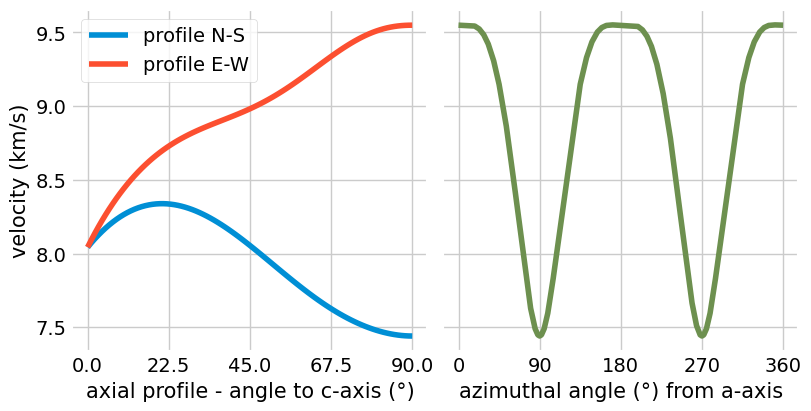

In [18]:
fig2, (ax1, ax2) = plt.subplots(figsize=(8, 4), ncols=2, sharey=True, constrained_layout=True)

# average polar Vp velocities (grouped and averaged by latitude angle)
ax1.plot(np.rad2deg(axial_props1["polar_ang"]), axial_props1["Vp"], label="profile N-S")
ax1.plot(np.rad2deg(axial_props2["polar_ang"]), axial_props2["Vp"], label="profile E-W")
ax1.set_ylabel("velocity (km/s)", fontsize=15)
ax1.set_xlabel("axial profile - angle to c-axis (°)", fontsize=15)
ax1.set_xticks([0, 22.5, 45, 67.5, 90])
ax1.legend()

# azimuthal (latitude == 0) Vp velocities
ax2.plot(np.rad2deg(azimuthal_props["azimuthal_ang"]), azimuthal_props["Vp"], color="C3")
ax2.set_xlabel("azimuthal angle (°) from a-axis", fontsize=15)
_ = ax2.set_xticks([0, 90, 180, 270, 360])


In [19]:
import sys
import matplotlib as mpl
from datetime import date    
today = date.today().isoformat()

print(f'Notebook tested in {today} using:')
print('Python', sys.version)
print('Numpy', np.__version__)
print('Matplotlib', mpl.__version__)

Notebook tested in 2025-01-27 using:
Python 3.12.4 | packaged by Anaconda, Inc. | (main, Jun 18 2024, 15:03:56) [MSC v.1929 64 bit (AMD64)]
Numpy 1.26.4
Matplotlib 3.10.0
